# **3 - Visualization**

## Viz Fundamentals

Import and use the **Iris** dataset, a classical ML dataset as used in the last part

In [13]:
import pandas as pd
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
iris = df.copy()

# Iris Visualization 

This dataset and few others will help me go through different plots for different highlight purpose.


## Histograms 

Plot to understand distributions, range and repartition.
This only works on numerical columns and it very limited in style...

Questions quickly answered with those plots 
- Are features normally distributed ?
- Are there scale differences ?
- Are there any visible outliers ? 

Look for : 
- Shape 
    - Reverse U shape -> approximatly normal distrib
    - Multimodal -> mixture of populations (classes)
- Spread 
    - Variance impact (``low = small spread`` or ``high = wide``)
- Features 
    - If distributions are very similar across features, the feature may be weak

    

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

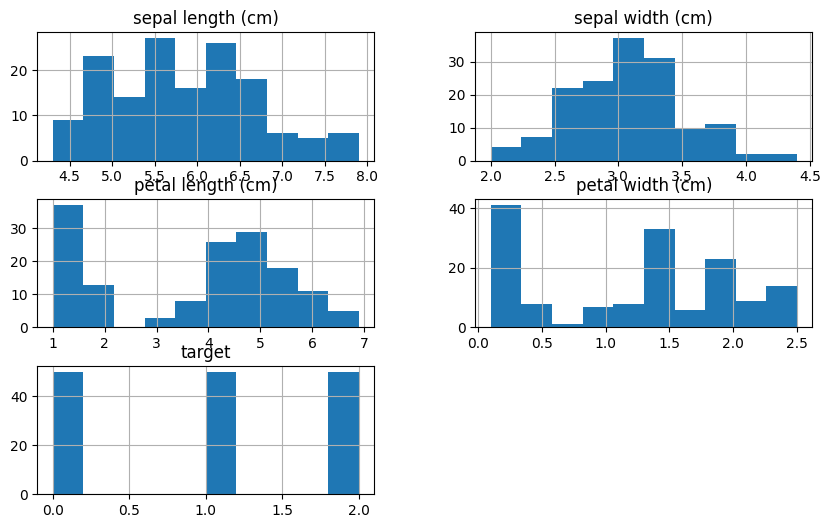

In [3]:
iris.hist(figsize=(10, 6))  # Figsize is optionnal and can be adjusted for better visibility

**Insights :** 

- `petal length` and `petal width`
    - show clear structure
    - wide spread
    - hint for class separation 
- `sepal length` and `sepal width`
    - overlap heavily
    - weaker discriminative powe

Those information already tells us petal features will explicit the model prediction

### Histogram by Class (Using `target`)

We split distributions using the **numeric target labels** :

- `0` → setosa  
- `1` → versicolor  
- `2` → virginica  

### Plot Petal Length Distribution per Class

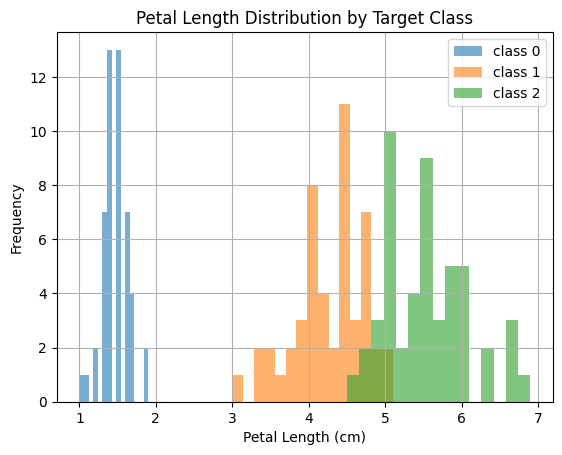

In [4]:
for label in iris["target"].unique():
    iris[iris["target"] == label]["petal length (cm)"].hist(
        bins=15,
        alpha=0.6,
        label=f"class {label}"
    )

plt.legend()
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")
plt.title("Petal Length Distribution by Target Class")
plt.show()

**Insights :** 

Here we can cleary see how the petal length impact the class 
- This highlight clearly different group so classification model will work well on this dataset

---

## KDE Plots (Kernel Density Estimation)

KDE plots are **smoothed versions of histograms**.
They estimate the underlying probability density of a numerical variable

KDEs help answer :
- How do **class distributions overlap** ?
- Where are **decision boundaries likely to be** ?
- Is a feature **useful for classification** ?

Compared to histograms :
- No bin-size sensitivity
- Easier class comparison
- Better visual separation

### KDE on Iris Dataset (Using `target`)

We use the numeric target (`0, 1, 2`) to reflect real ML pipelines.

#### KDE for Petal Length (Best Feature)

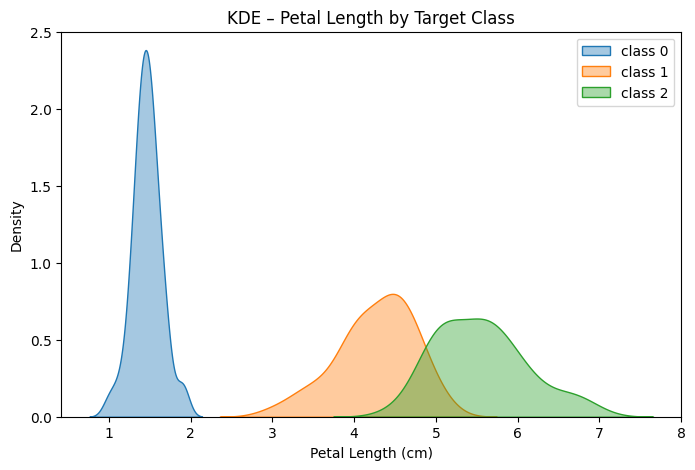

In [5]:
plt.figure(figsize=(8, 5))

for label in iris["target"].unique():
    sns.kdeplot(
        iris[iris["target"] == label]["petal length (cm)"],
        label=f"class {label}",
        fill=True,
        alpha=0.4
    )

plt.xlabel("Petal Length (cm)")
plt.title("KDE – Petal Length by Target Class")
plt.legend()
plt.show()

It showcase the same information as the previous histograms plot but here it's cleaner.

- Overlap area : classification difficulty 
- Peak width : intra-class variance

Can be read as : 
- `Class 0` is fully isolated
- `Class 1` and `Class 2` partially overlap (may be the petal width will reveal more information)
- Clear low-density regions = potential decision boundaries

This explains why linear classifiers may not work here 

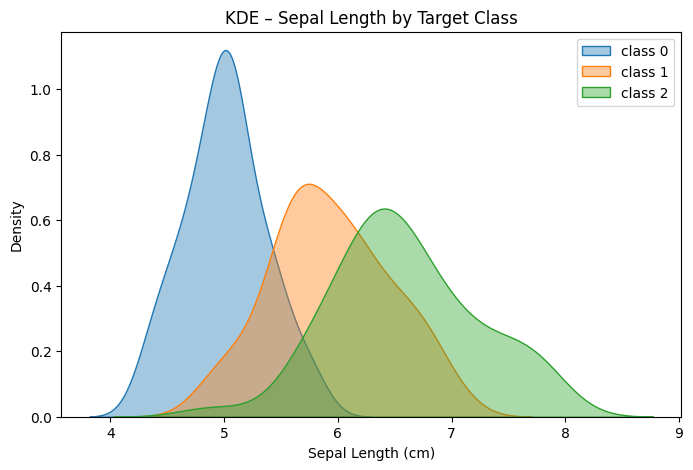

In [6]:
plt.figure(figsize=(8, 5))

for label in iris["target"].unique():
    sns.kdeplot(
        iris[iris["target"] == label]["sepal length (cm)"],
        label=f"class {label}",
        fill=True,
        alpha=0.4
    )

plt.xlabel("Sepal Length (cm)")
plt.title("KDE – Sepal Length by Target Class")
plt.legend()
plt.show()


By choosing another feature we can see that this one heavily overlaps. 
As shown by the previous analysis we did in part 2 using the correlation matrix : 

- Petal features dominate 
- Sepal feature add limited value


For this type of graphics you need to target first what you want to see and compares it with the same scale (be careful of outliers) ! 

---

## Scatter Plots 

Scatter plots are used to:
- visualize relationships between two numerical features
- detect clusters
- assess class separability
- anticipate decision boundaries

### Basic Scatter Plot (Colored by Target)

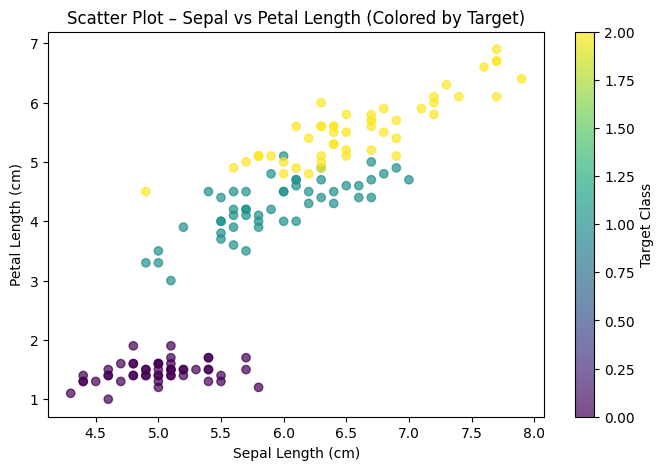

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.scatter(
    iris["sepal length (cm)"],
    iris["petal length (cm)"],
    c=iris["target"],
    cmap="viridis",
    alpha=0.7
)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Scatter Plot – Sepal vs Petal Length (Colored by Target)")
plt.colorbar(label="Target Class")
plt.show()

It's another way to showcase the previous information !
But this time we compare 2 features so we highlight their relation

Here we have : 
- clusters : natural class separation
- overlap zones : classification difficulty ( still beetween class ``1`` and ``2``)
- linear separability : simple models may work

# Boxplots 

Boxplots summarize statistics information, they highlight those 3 informations : 
- Median 
- Quartile and interquartile range 
- Outliers 

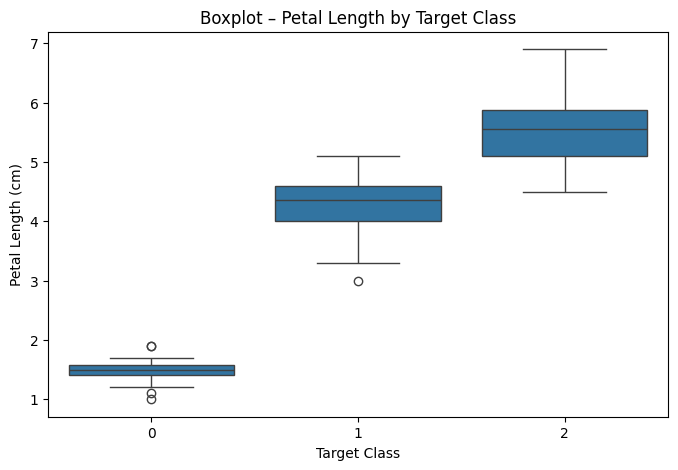

In [8]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=iris,
    x="target",
    y="petal length (cm)"
)

plt.xlabel("Target Class")
plt.ylabel("Petal Length (cm)")
plt.title("Boxplot – Petal Length by Target Class")
plt.show()


## How to read it ? 

**Median line** represents the median (e.g central tendency)
The **variance** is showcased by the box height
The **outliers** are the individuals highlights by the points


Here we have the same overlap as shown in the previous graph (between class ``1`` and ``2``)
This confirms our **KDE conclusions** and our **scatter plot hypothesis**.

# Violin Plots

Combine **KDE plots** and **Boxplots**
They are ideal if you need only one graph to summarize statistics and density information


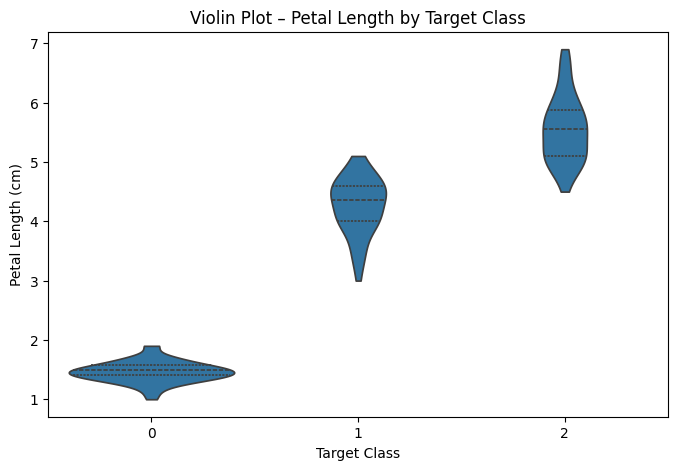

In [9]:
plt.figure(figsize=(8, 5))

sns.violinplot(
    data=iris,
    x="target",
    y="petal length (cm)",
    inner="quartile",
    cut=0
)

plt.xlabel("Target Class")
plt.ylabel("Petal Length (cm)")
plt.title("Violin Plot – Petal Length by Target Class")
plt.show()

### How to read it 

- **`Width`** shows us the density 
- **`Median and quartile`**
- **`Shape asymmetry`** shows skewness
- **`Overlap`** between `Class 1` and `Class 2`

# Pairplot 

Pairplot provide the user with complete information about the dataset 
It showcases a total overview of all the features interactions between each one of them

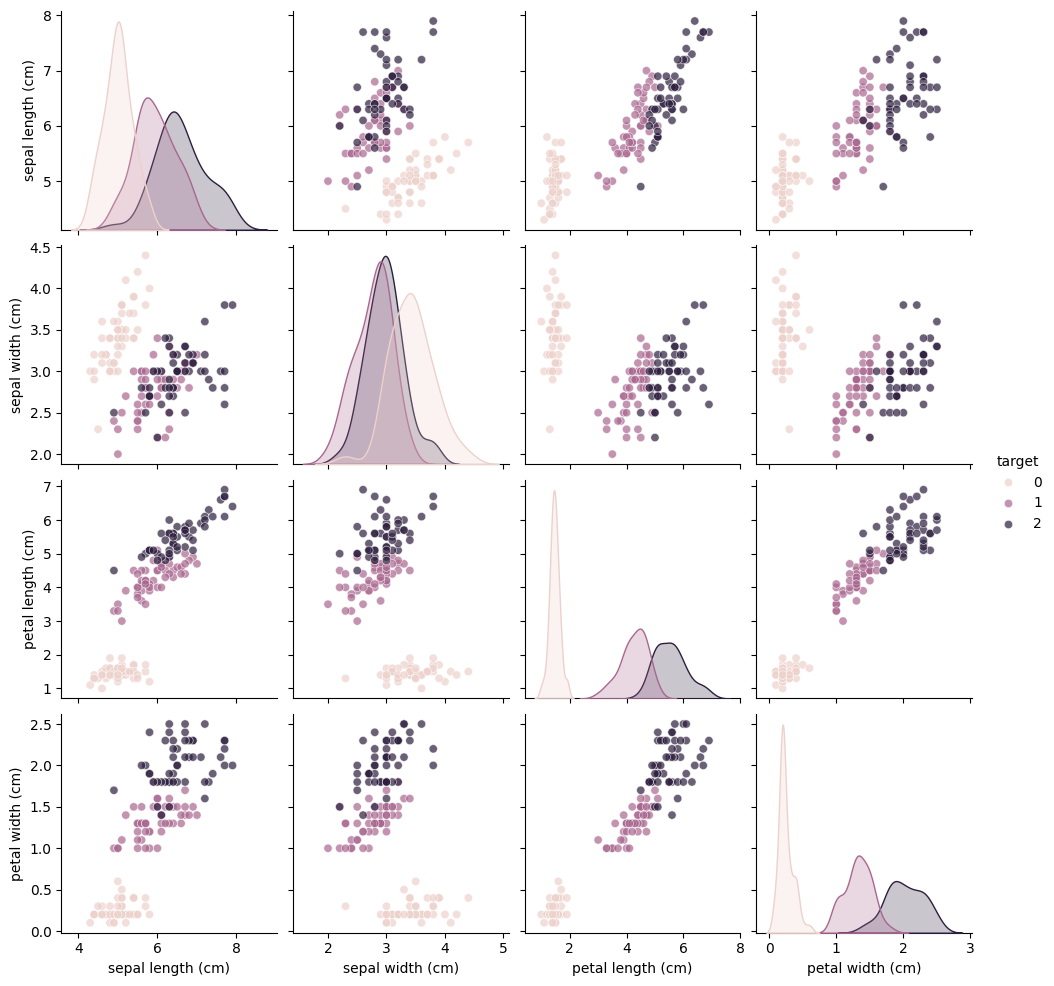

In [10]:
sns.pairplot(
    iris,
    hue="target",
    diag_kind="kde",
    plot_kws={"alpha": 0.7}
)

### How to read 

- **Diagonal** are univariate distributions (KDE plot)
- The plot matrix is symetrical so only half of them are unique 
- Off-diagonal : pairwise scatter plots

### What to look for 

- Clean cluster separation 
- Redundant features 
- liner vs non-linear structure

# Heatmap - Correlation Matrix

Correlation heatmaps visualize **relationships between numerical features** like the plots before
- redundancy
- multicollinearity
- feature interactions

Correlation quantifies **linear relationships** between variables and it does not implicate causation

| Value | Meaning |
|----|-------|
| `+1` | Perfect positive correlation |
| `0` | No linear correlation |
| `-1` | Perfect negative correlation |



### Correlation Matrix

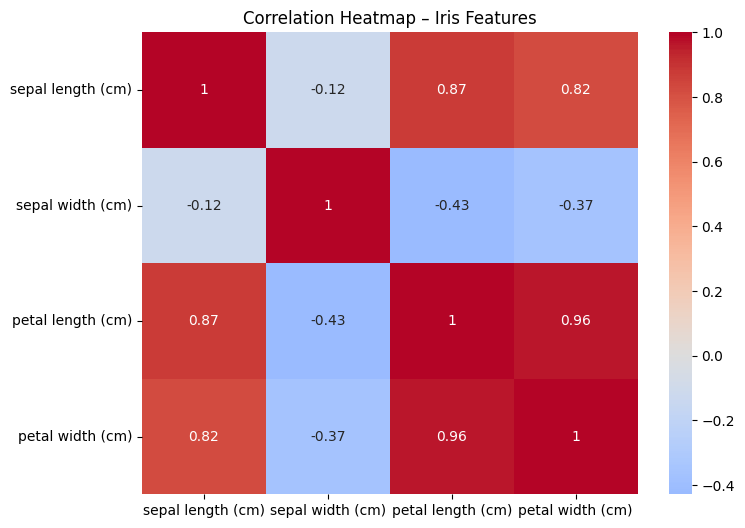

In [12]:
corr = iris.drop(columns=["target"]).corr()

plt.figure(figsize=(8, 6))

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Heatmap – Iris Features")
plt.show()

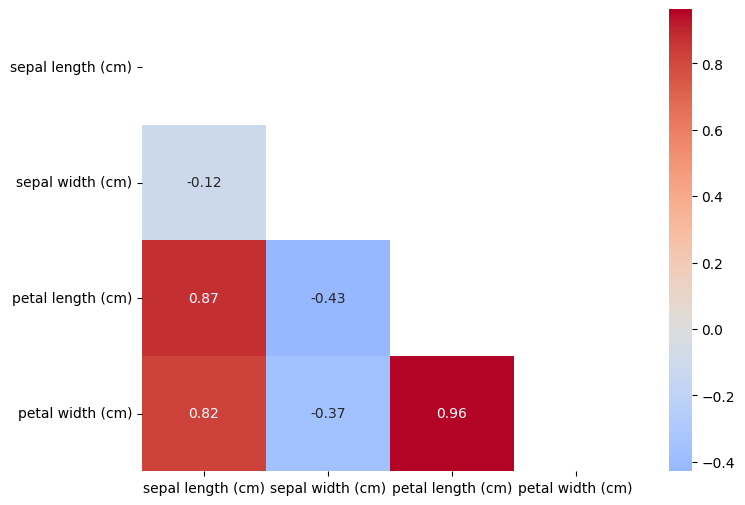

In [14]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.show()

**From the heatmap :**
- ``petal length`` and ``petal width``  => very strong correlation
- ``Sepal`` features => weakly correlated

**Suggests :**
- possible feature removal
- PCA effectiveness

it explains why simple models perform well and dimensionality reduction works